In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
#handling manipulation of data to get size of images and count them
import pandas as pd
import numpy as np
#handling showing images 
import matplotlib.pyplot as plt
%matplotlib inline
#handling style of showing images and graphics in matplotlib
#import seaborn as sns
#sns.set(style="whitegrid")
#handling folders and help in read and remove folders
import os
#handling pathes of folders and return content of specific pathes
import glob as gb
import cv2
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
trainpath ='/kaggle/input/panda-or-bear-image-classification/PandasBears/Train/'
testpath = '/kaggle/input/panda-or-bear-image-classification/PandasBears/Test/'

In [3]:
for folder in  os.listdir(trainpath ) : 
    files = gb.glob(pathname= str( trainpath + folder + '/*.jpeg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 250 in folder Pandas
For training data , found 250 in folder Bears


In [4]:
for folder in  os.listdir(testpath ) : 
    files = gb.glob(pathname= str( testpath + folder + '/*.jpeg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 50 in folder Pandas
For training data , found 50 in folder Bears


In [5]:
#dictionary of all exist classes and its numberic values in used in dataset 
code = {'Pandas':0 ,'Bears':1 }

#used for getting name of class x  using its number n or y
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

In [6]:
size = []

for folder in  os.listdir(trainpath ) : 
    files = gb.glob(pathname= str( trainpath + folder + '/*.jpeg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
        
#count each similar size contained in size list to know most common size in images        
pd.Series(size).value_counts()

(256, 256, 3)    500
dtype: int64

In [7]:
size = []
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str( testpath + folder + '/*.jpeg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(256, 256, 3)    100
dtype: int64

In [8]:
s = 224

In [9]:
#empty list to contain images itself called featues for the CNN model  
X_train = []
#empty list to contain actual value for each image
y_train = []

for folder in  os.listdir(trainpath ) : 
    files = gb.glob(pathname= str( trainpath + folder + '/*.jpeg'))
    for file in files: 
        image = cv2.imread(file)
        #using cv2.resize without determine interpolation make it preserve aspect ratio for each image 
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [10]:
print(f'we have {len(X_train)} items in X_train')

we have 500 items in X_train


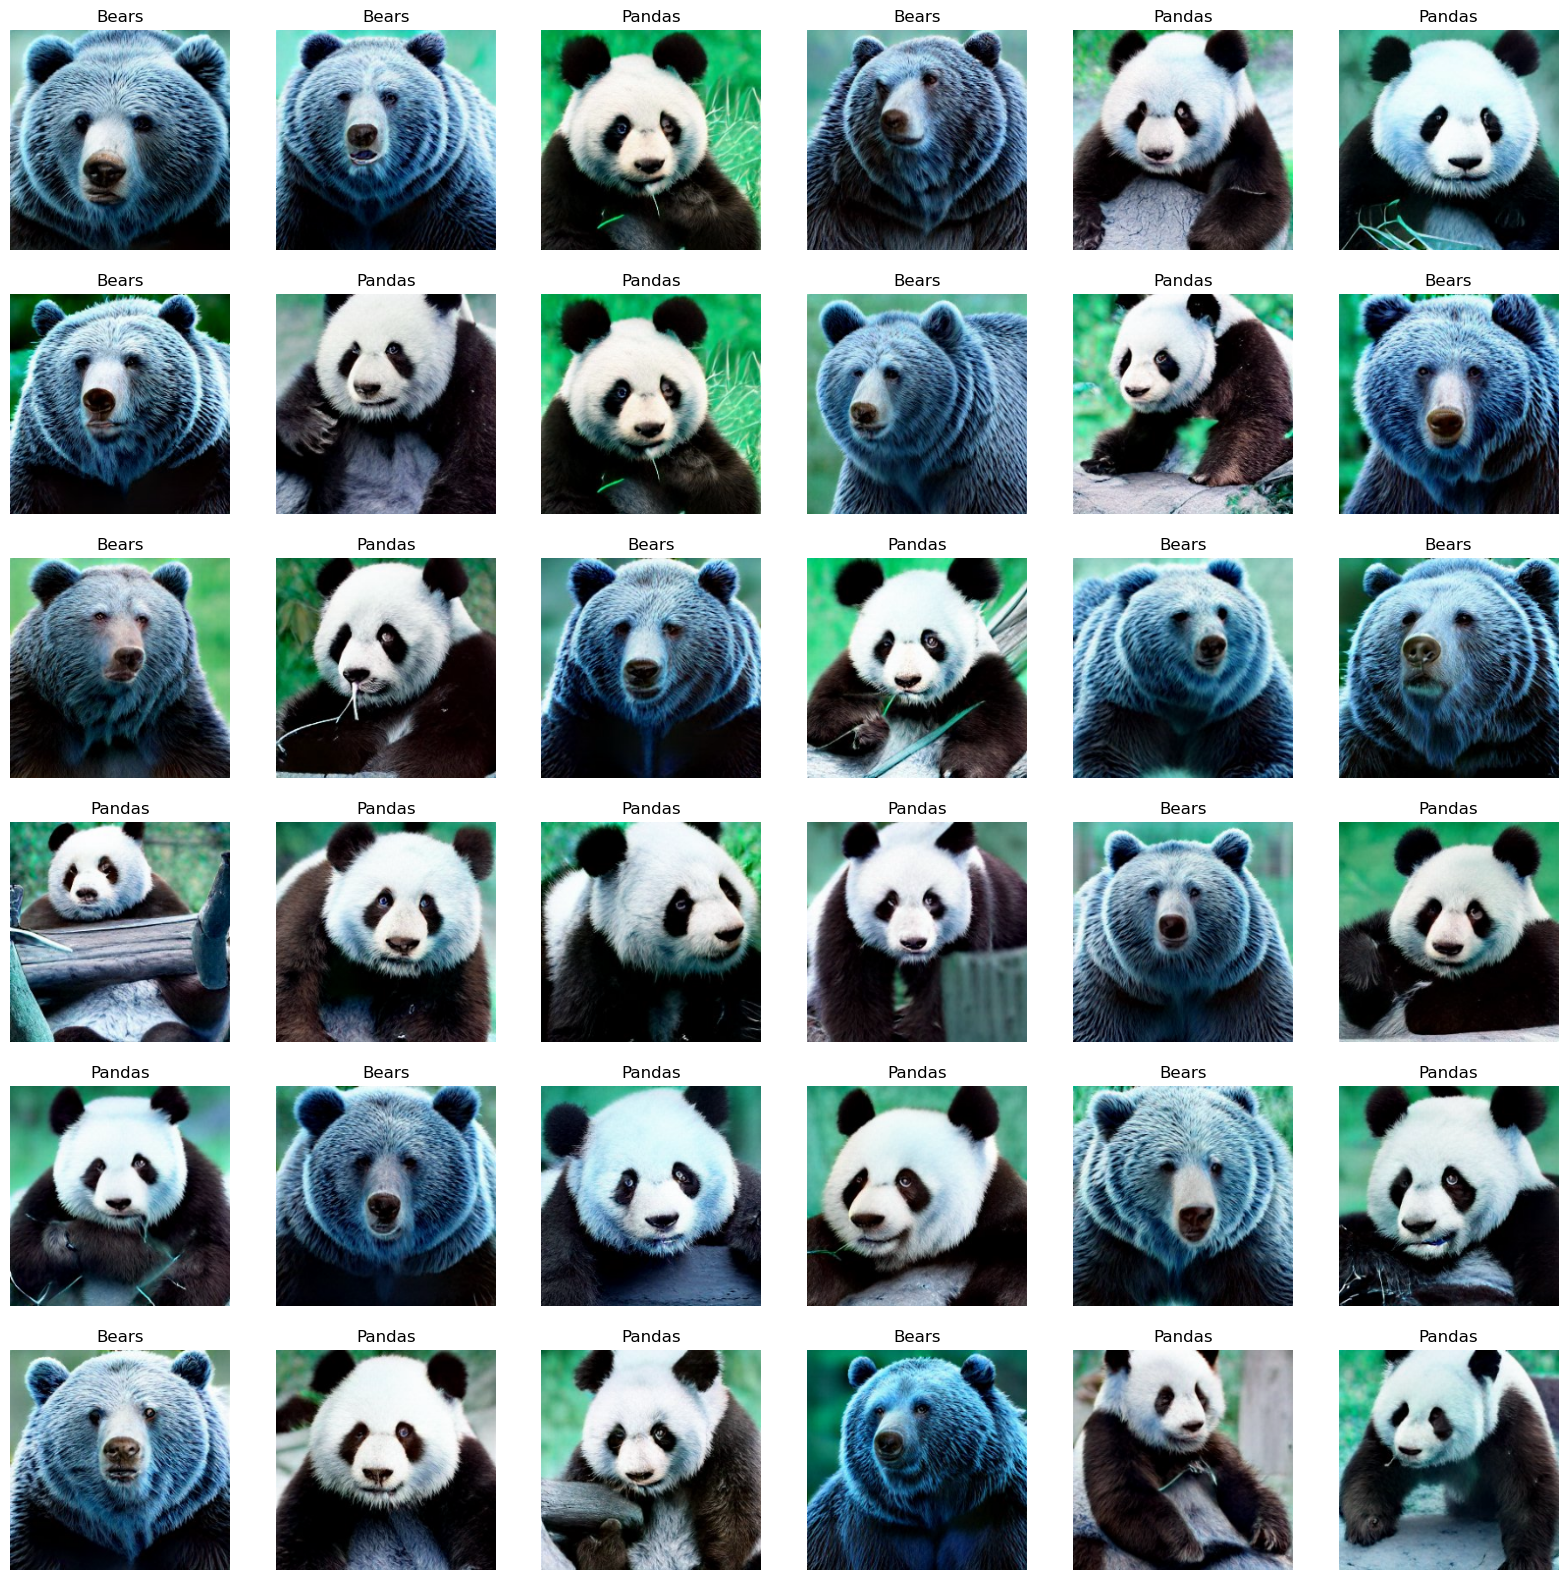

In [11]:
plt.figure(figsize=(20,20))

for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [12]:
X_test = []
y_test = []
for folder in  os.listdir(testpath ) : 
    files = gb.glob(pathname= str(testpath + folder + '/*.jpeg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

In [13]:
print(f'we have {len(X_test)} items in X_test')

we have 100 items in X_test


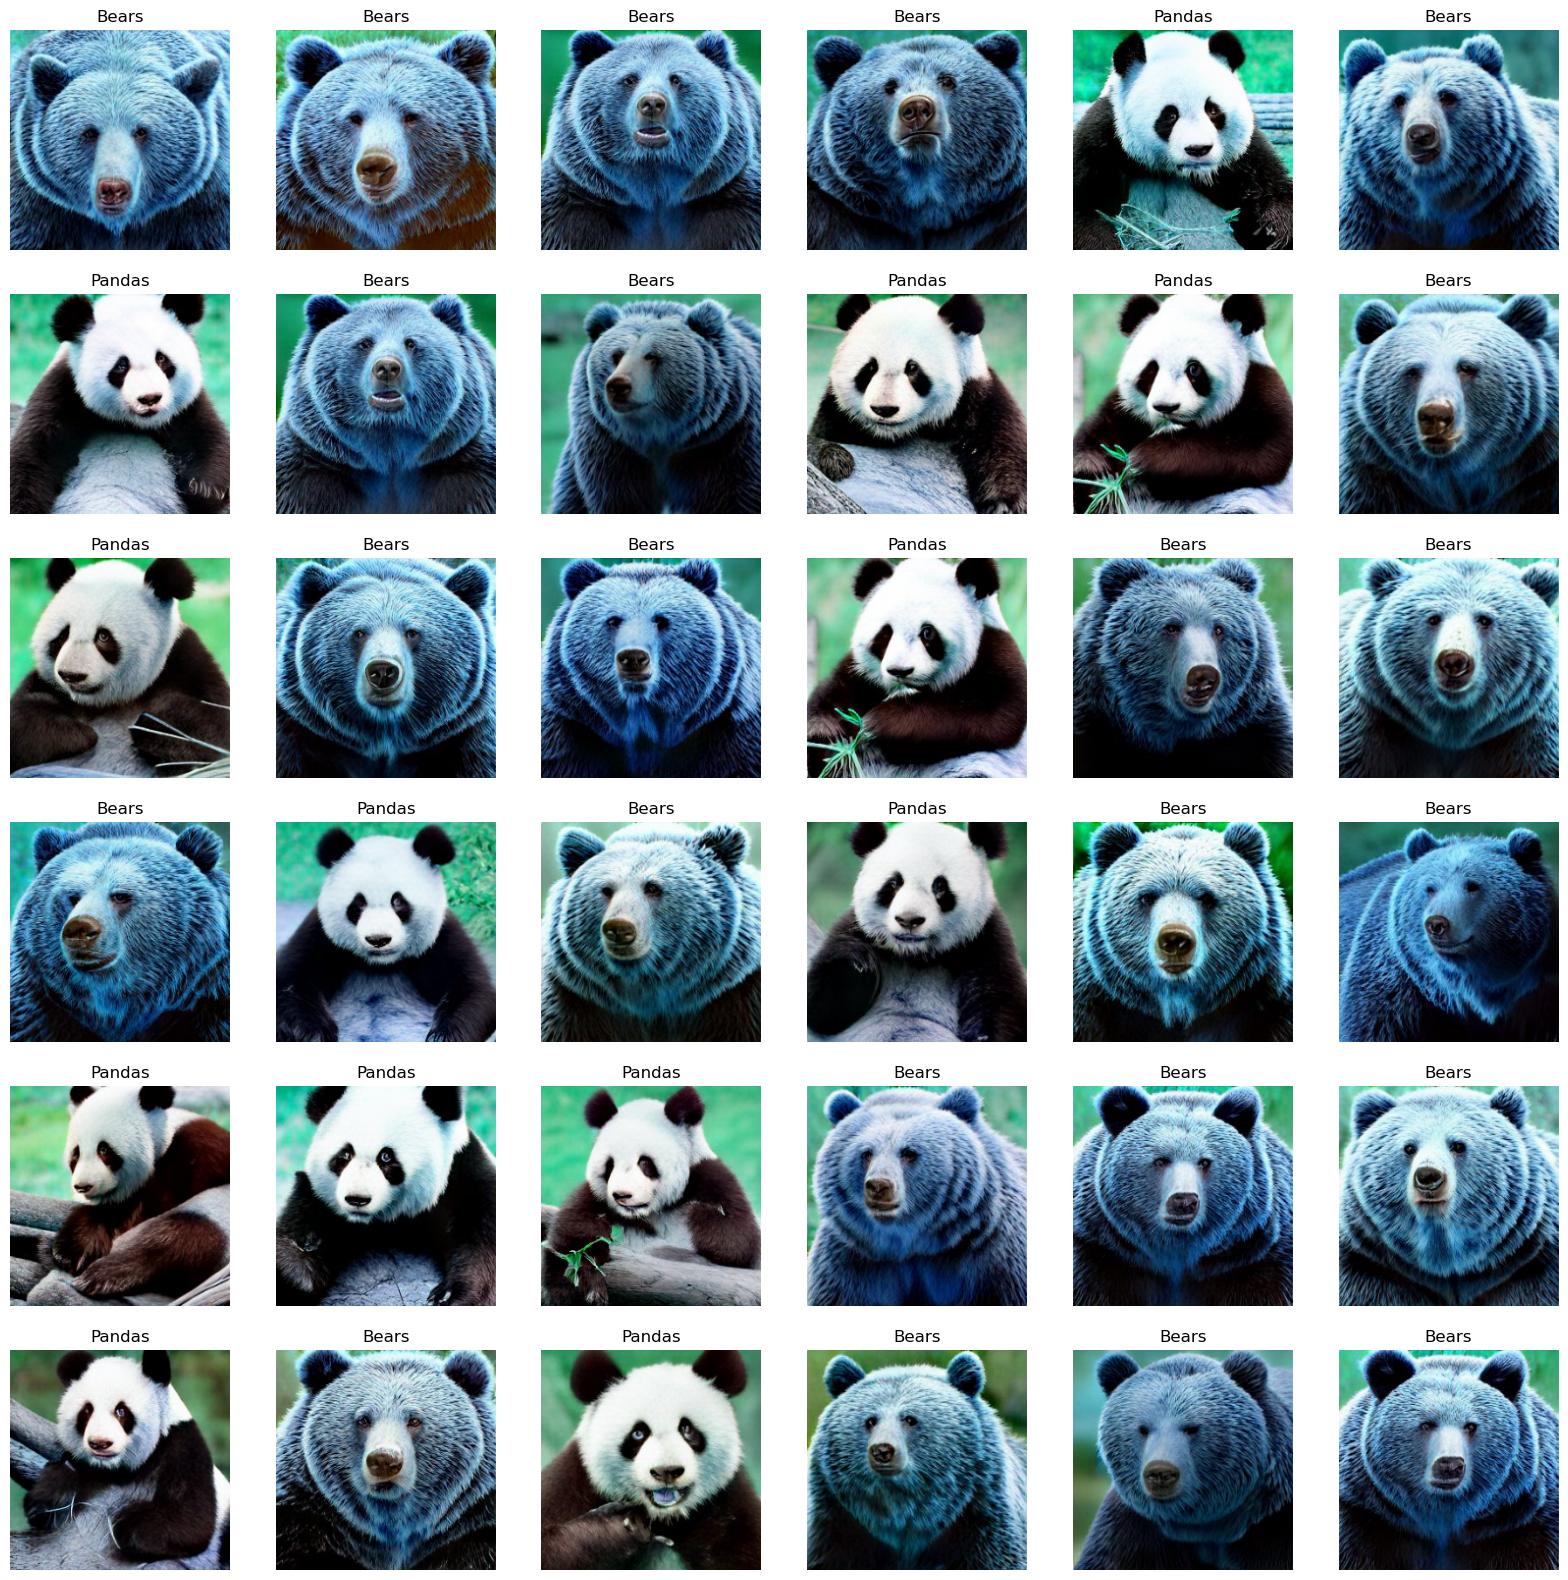

In [14]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [15]:
X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')

print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (500, 224, 224, 3)
X_test shape  is (100, 224, 224, 3)
y_train shape  is (500,)
y_test shape  is (100,)


In [16]:
mobilenet_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

mobilenet_model_without_top_layer = hub.KerasLayer(
    mobilenet_model, input_shape=(s, s, 3), trainable=False)

In [17]:
num_of_classes = 2

mobilenetmodel = tf.keras.Sequential([
  mobilenet_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

mobilenetmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [18]:
mobilenetmodel.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

mobilenetmodel.fit(X_train, y_train, epochs=5)

Epoch 1/5
16/16 [==============================] - 12s 67ms/step - loss: 0.5047 - acc: 0.7620
Epoch 2/5
16/16 [==============================] - 1s 33ms/step - loss: 0.1570 - acc: 0.9680
Epoch 3/5
16/16 [==============================] - 1s 33ms/step - loss: 0.0836 - acc: 0.9820
Epoch 4/5
16/16 [==============================] - 1s 32ms/step - loss: 0.0518 - acc: 0.9960
Epoch 5/5
16/16 [==============================] - 1s 32ms/step - loss: 0.0398 - acc: 0.9980


In [19]:
mobilenetmodel.evaluate(X_test,y_test)

4/4 [==============================] - 1s 190ms/step - loss: 0.0404 - acc: 1.0000


[0.04038521274924278, 1.0]

In [20]:
efficientnet_model = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/classification/2"

efficientnet_model_without_top_layer = hub.KerasLayer(
    efficientnet_model, input_shape=(s, s, 3), trainable=False)

In [21]:
num_of_classes = 2

efficientnetmodel = tf.keras.Sequential([
  efficientnet_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

efficientnetmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1000)              7200312   
                                                                 
 dense_1 (Dense)             (None, 2)                 2002      
                                                                 
Total params: 7,202,314
Trainable params: 2,002
Non-trainable params: 7,200,312
_________________________________________________________________


In [22]:
efficientnetmodel.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

efficientnetmodel.fit(X_train, y_train, epochs=5)

Epoch 1/5
16/16 [==============================] - 9s 85ms/step - loss: 18.5191 - acc: 0.7780
Epoch 2/5
16/16 [==============================] - 1s 40ms/step - loss: 9.2241 - acc: 0.8760
Epoch 3/5
16/16 [==============================] - 1s 41ms/step - loss: 6.0947 - acc: 0.8600
Epoch 4/5
16/16 [==============================] - 1s 41ms/step - loss: 4.2742 - acc: 0.8720
Epoch 5/5
16/16 [==============================] - 1s 40ms/step - loss: 3.2629 - acc: 0.8720


In [23]:
efficientnetmodel.evaluate(X_test,y_test)

4/4 [==============================] - 2s 228ms/step - loss: 7.0980 - acc: 0.8200


[7.097967624664307, 0.8199999928474426]

In [24]:
regnet_model = "https://tfhub.dev/adityakane2001/regnety800mf_classification/1"

regnet_model_without_top_layer = hub.KerasLayer(
    regnet_model, input_shape=(s, s, 3), trainable=False)

In [25]:
num_of_classes = 2

regnetmodel = tf.keras.Sequential([
  regnet_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

regnetmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1000)              6501119   
                                                                 
 dense_2 (Dense)             (None, 2)                 2002      
                                                                 
Total params: 6,503,121
Trainable params: 2,002
Non-trainable params: 6,501,119
_________________________________________________________________


In [26]:
regnetmodel.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

regnetmodel.fit(X_train, y_train, epochs=5)

Epoch 1/5
16/16 [==============================] - 9s 117ms/step - loss: 3.5084 - acc: 0.5280
Epoch 2/5
16/16 [==============================] - 1s 35ms/step - loss: 0.9462 - acc: 0.6140
Epoch 3/5
16/16 [==============================] - 1s 35ms/step - loss: 0.3297 - acc: 0.8840
Epoch 4/5
16/16 [==============================] - 1s 35ms/step - loss: 0.1871 - acc: 0.9880
Epoch 5/5
16/16 [==============================] - 1s 35ms/step - loss: 0.1222 - acc: 1.0000


In [28]:
regnetmodel.evaluate(X_test,y_test)

4/4 [==============================] - 2s 272ms/step - loss: 0.1099 - acc: 1.0000


[0.10989478975534439, 1.0]